<a href="https://colab.research.google.com/github/yoohw0317/DAPproject/blob/main/DAP_project(Hayatt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get update 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re
import copy
from wordcloud import WordCloud 
from konlpy.tag import Okt
from collections import Counter
from google.colab import files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
files.upload()

In [5]:
stopWords = pd.read_excel('https://github.com/yoohw0317/DAPproject/blob/main/stopwordsHayatt.xlsx?raw=true').values.tolist()

In [6]:
font_label=fm.FontProperties(fname='/content/this.ttf', size=20)
font_title=fm.FontProperties(fname='/content/this.ttf', size=30)
font_xticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_yticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_bar=fm.FontProperties(fname='/content/this.ttf', size=15)

In [7]:
df = pd.read_excel("https://github.com/yoohw0317/DAPproject/blob/main/data_hayatt.xlsx?raw=true")
df = df[['score', 'review']]
df.dropna
df

,score,review
0,5,깔끔하고 청결하고 뷰도 좋습니다. 편하게 쉬고자 한다면 추천합니다. 숙소 근처가 조...
1,5,여자친구와 기념일 겸 파크하얏트에 방문을 하였습니다.직원의 친절도 방의 깨끗함 최상...
2,5,아주 훌륭하고 좋음 비싼 이유가 있다 만족 너무 추천 가격빼고 ! 어메니티는 좀 더...
3,5,"부산 파크하얏트도 역시 파크하얏트다운 좋은 로케, 서비스 제공하여 만족했습니다. 뷰..."
4,1,객실 도어락이 고장나서 투숙기간 동안 두번 수리 기사가 방문해서 문고리 뜯어 고침 ...
...,...,...
1295,5,"내 마음에 드는 호텔 입니다. 모든 것이 좋은: 전면 유리창, 좋은 질감 이 부드러..."
1296,4,"파크 하얏트 부산 은 전반적으로 적절한. 그러나, 한 가족이 아니다 - 친절한 호텔..."
1297,5,"확실히 최고의 호텔이었어요. 다른 도시 마법사와는 달리, 부산의 호텔은 파크 하얏트..."
1298,5,파크 하얏트 에서 숙박을 즐길 수 있는. 직원들은 매우 친절하고 세심한. 방은 멋진...


In [36]:
okt = Okt()
def regularExpression (text):
  exp = re.compile('[^ 가-힣]').sub('', text);
  return exp
def corpusToNounsCounter (text):
  text = regularExpression(text)
  nouns = okt.nouns(text)
  nouns = [x for x in nouns if [x] not in stopWords]
  nouns = [x for x in nouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
  nouns_counter = Counter(nouns)
  return nouns_counter  
def corpusToNouns (text):
  text = regularExpression(text)
  nouns = okt.nouns(text)
  nouns = [x for x in nouns if [x] not in stopWords]
  nouns = [x for x in nouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
  return nouns

In [9]:
totalCorpus = "".join(df['review'].tolist())
totalCount = corpusToNouns(totalCorpus)

In [10]:
top50 = totalCount.most_common(50)
x = [x for (x, y) in top50]
y = [y for (x, y) in top50]
colors_top50 = sns.color_palette('Spectral', 50)

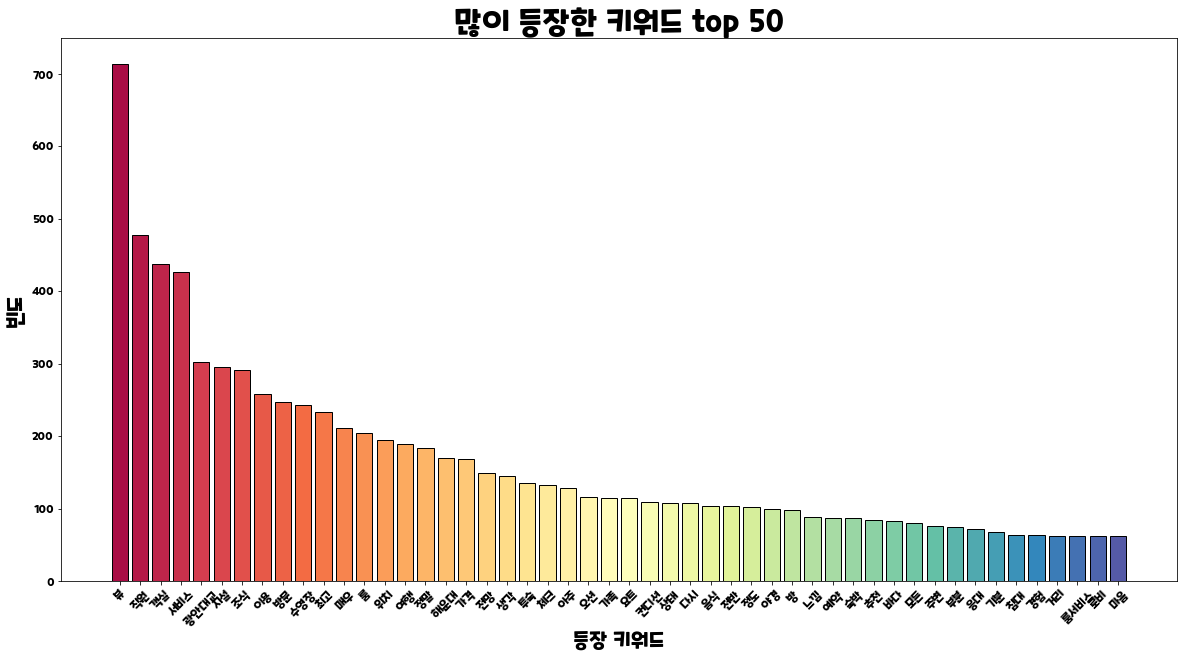

In [11]:
plt.figure(figsize = (20, 10))
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

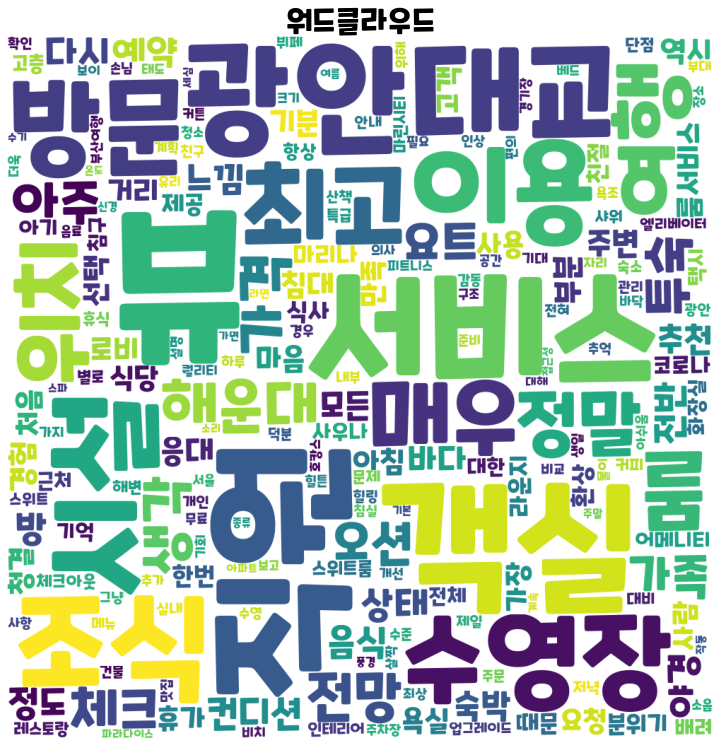

In [12]:
wordCloud = WordCloud(max_font_size=250, font_path='/content/this.ttf', background_color='white', width=1000, height=1000).generate_from_frequencies(totalCount)
plt.figure(figsize=(13, 13))
plt.imshow(wordCloud)
plt.title("워드클라우드", fontproperties=font_title)
plt.axis('off')
plt.show()

In [13]:
rating = Counter(df['score'])
rating = sorted(rating.items())
rating

[(1, 38), (2, 31), (3, 55), (4, 271), (5, 905)]

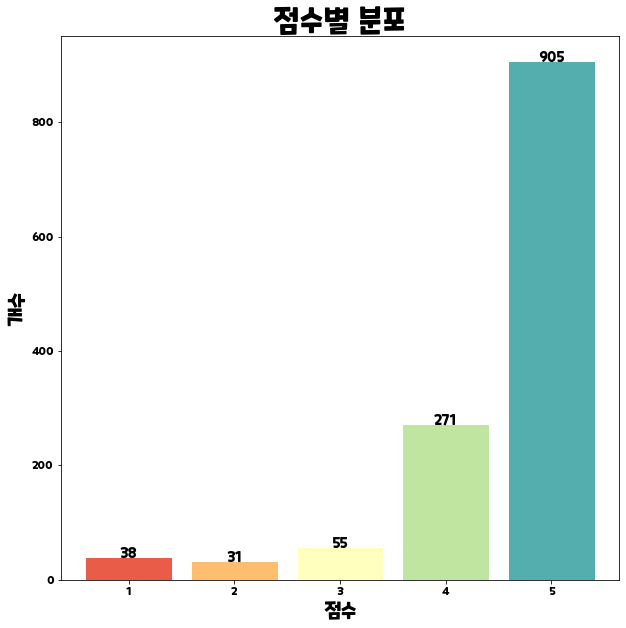

In [14]:
colors_rating = sns.color_palette('Spectral', 5)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
x = [x for (x, y) in rating]
y = [y for (x, y) in rating]
bars = plt.bar(x, y, color=colors_rating, edgecolor=colors_rating)

barText_rating = y
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width() * (1/2), b.get_height()+0.2, barText_rating[i], ha='center', fontsize=13, fontproperties=font_bar)

plt.xlabel("점수",fontproperties=font_label)
plt.ylabel("개수",fontproperties=font_label)
plt.xticks(fontproperties=font_xticks)
plt.yticks(fontproperties=font_yticks)
plt.title("점수별 분포",fontproperties=font_title)
plt.show()

선호 리뷰와 비선호 리뷰를 분석해봅시다.

In [37]:
likes =  df[df['score']>3]
dislikes = df[df['score'] <= 3]
likesCorpus = "".join(likes['review'])
likesNouns = corpusToNounsCounter("".join(likesCorpus))
dislikesCorpus = "".join(dislikes['review'])
dislikesNouns = corpusToNounsCounter("".join(dislikesCorpus))

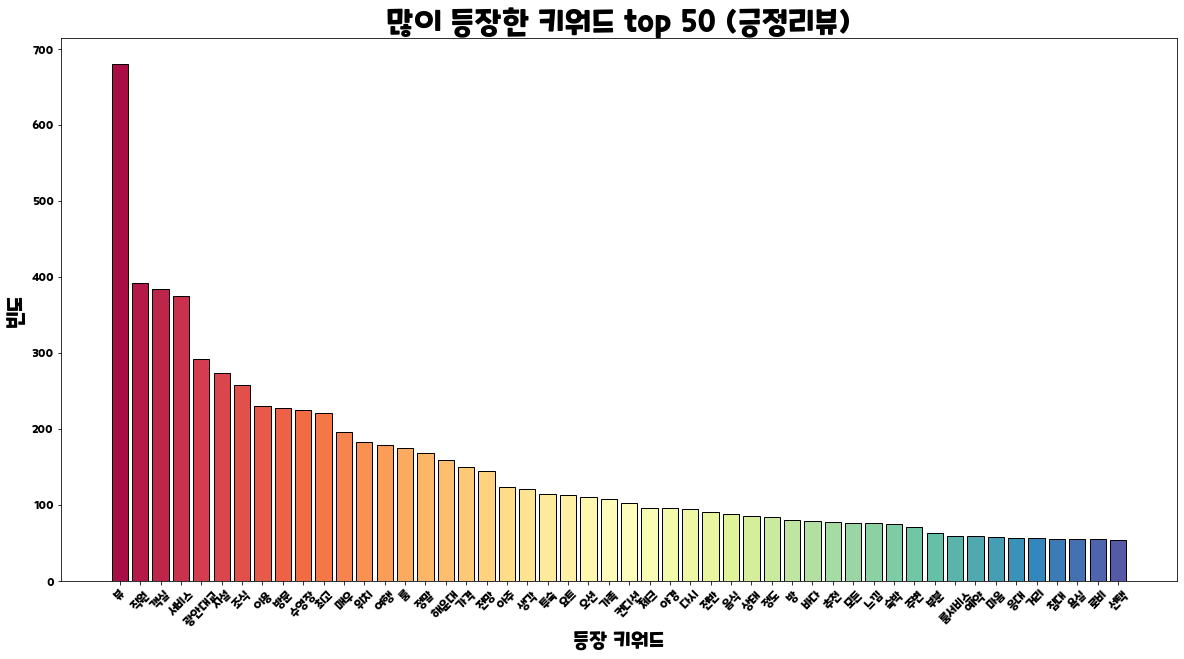

In [38]:
likes_top50 = likesNouns.most_common(50)
plt.figure(figsize = (20, 10))
x = [x for (x, y) in likes_top50]
y = [y for (x, y) in likes_top50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50 (긍정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

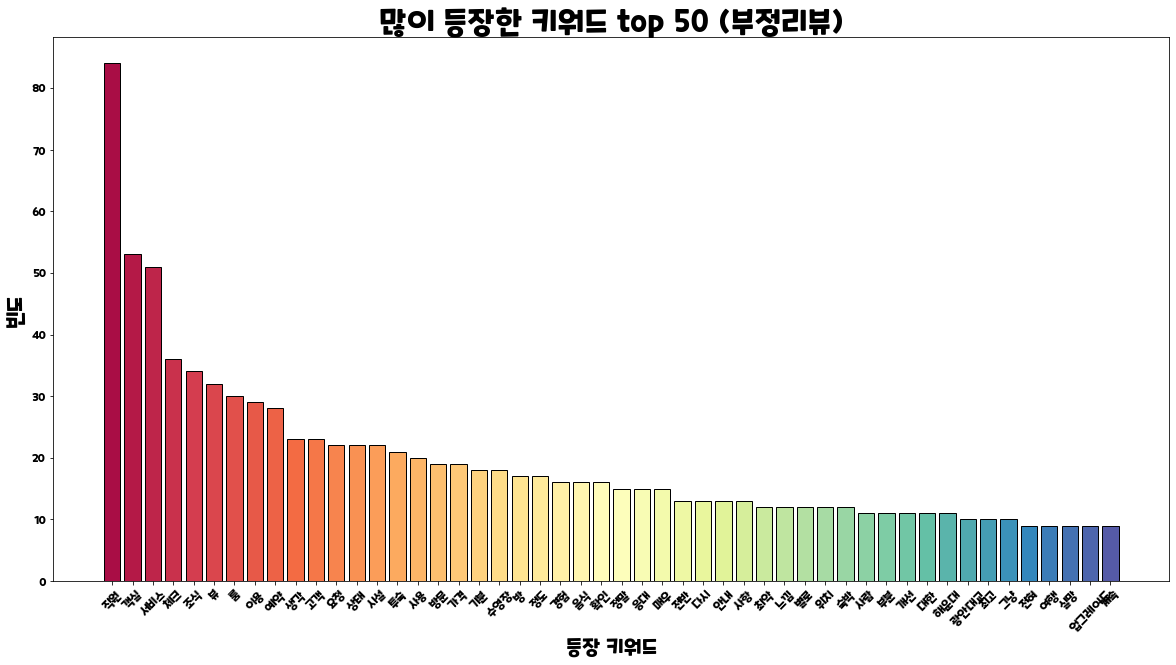

In [39]:
dislikes_top50 = dislikesNouns.most_common(50)
plt.figure(figsize = (20, 10))
x = [x for (x, y) in dislikes_top50]
y = [y for (x, y) in dislikes_top50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50 (부정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

In [40]:
vect =  CountVectorizer(tokenizer = corpusToNouns)
reviewList = df['review'].tolist()
bow_vect = vect.fit_transform(reviewList)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
word_count_dict = dict(zip(word_list, count_list))

boW 벡터와 관련하여 TF-IDF 변환을 진행

In [42]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [43]:
def likeDislike(score):
  if score >= 4:
    return 1
  else:
    return 0

In [44]:
df_test = copy.deepcopy(df)
df_test['likeDislike'] = df_test['score'].apply(likeDislike)
df_test

,score,review,likeDislike
0,5,깔끔하고 청결하고 뷰도 좋습니다. 편하게 쉬고자 한다면 추천합니다. 숙소 근처가 조...,1
1,5,여자친구와 기념일 겸 파크하얏트에 방문을 하였습니다.직원의 친절도 방의 깨끗함 최상...,1
2,5,아주 훌륭하고 좋음 비싼 이유가 있다 만족 너무 추천 가격빼고 ! 어메니티는 좀 더...,1
3,5,"부산 파크하얏트도 역시 파크하얏트다운 좋은 로케, 서비스 제공하여 만족했습니다. 뷰...",1
4,1,객실 도어락이 고장나서 투숙기간 동안 두번 수리 기사가 방문해서 문고리 뜯어 고침 ...,0
...,...,...,...
1295,5,"내 마음에 드는 호텔 입니다. 모든 것이 좋은: 전면 유리창, 좋은 질감 이 부드러...",1
1296,4,"파크 하얏트 부산 은 전반적으로 적절한. 그러나, 한 가족이 아니다 - 친절한 호텔...",1
1297,5,"확실히 최고의 호텔이었어요. 다른 도시 마법사와는 달리, 부산의 호텔은 파크 하얏트...",1
1298,5,파크 하얏트 에서 숙박을 즐길 수 있는. 직원들은 매우 친절하고 세심한. 방은 멋진...,1


In [45]:
x = tf_idf_vect
y = df_test['likeDislike']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
logi = LogisticRegression(random_state = 0)
logi.fit(x_train, y_train)
y_pred = logi.predict(x_test)

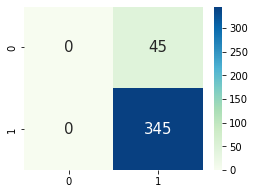

accurancy:  0.8846153846153846
precision:  0.8846153846153846
recall:  1.0
F1:  0.9387755102040816


In [46]:
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='GnBu', fmt='.10g')
plt.show()
print('accurancy: ', accuracy_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

In [47]:
df_test['likeDislike'].value_counts()

1    1176
0     124
Name: likeDislike, dtype: int64

In [48]:
positiveRandom = df_test[df_test['likeDislike'] == 1].sample(124, random_state=12).index.tolist()
negativeRandom = df_test[df_test['likeDislike'] == 0].sample(124, random_state=12).index.tolist()

In [49]:
random = positiveRandom + negativeRandom
x = tf_idf_vect[random]
y = df_test['likeDislike'][random]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
logi2 = LogisticRegression(random_state = 0)
logi2.fit (x_train, y_train)
y_predict = logi2.predict(x_test)

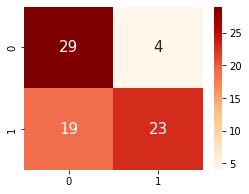

accurancy:  0.6933333333333334
precision:  0.8518518518518519
recall:  0.5476190476190477
F1:  0.6666666666666667


In [50]:
confusion = confusion_matrix(y_true = y_test, y_pred = y_predict)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15 }, cmap='OrRd', fmt='.10g')
plt.show()
print('accurancy: ', accuracy_score(y_test, y_predict))
print('precision: ', precision_score(y_test, y_predict))
print('recall: ', recall_score(y_test, y_predict))
print('F1: ', f1_score(y_test, y_predict))

In [51]:
color = pd.DataFrame(columns = {'positive'})
color['positive'] = logi2.coef_[0] > 0

(array([-0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25]),
 <a list of 9 Text major ticklabel objects>)

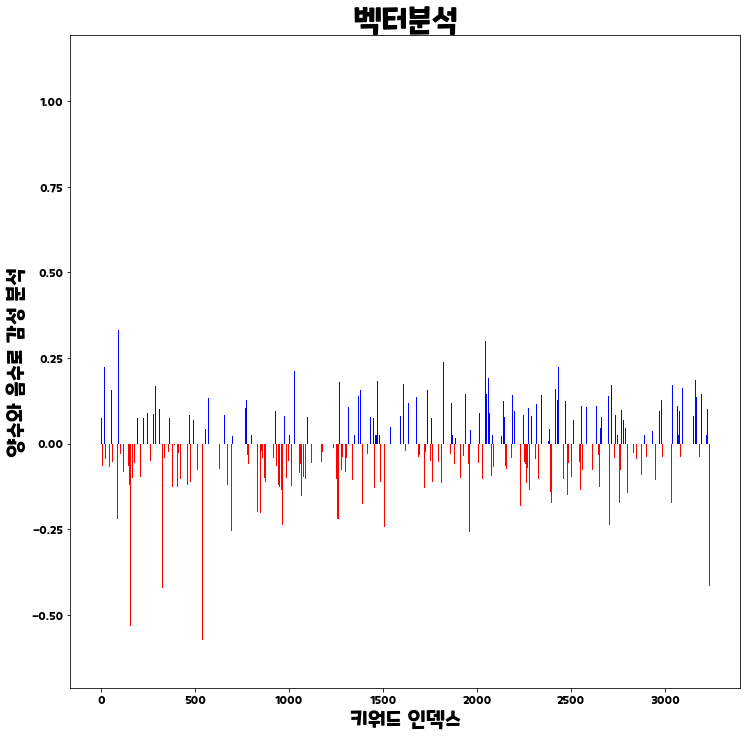

In [57]:
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize= (12, 12))
plt.bar(range(len(logi2.coef_[0])), logi2.coef_[0], color = color.positive.map({True: 'b', False: 'r'}))
plt.xlabel("키워드 인덱스",fontproperties=font_label)
plt.ylabel("양수와 음수로 감성 분석",fontproperties=font_label)
plt.title("벡터분석",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks)
plt.yticks(fontproperties=font_yticks)

In [58]:
pos_index = sorted(((value, index)for index, value in enumerate(logi2.coef_[0])),reverse = True)
neg_index = sorted(((value, index)for index, value in enumerate(logi2.coef_[0])),reverse = False)

In [59]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}

In [60]:
for x in pos_index[:30]:
  print(invert_index_vectorizer[x[1]], x[0])

뷰 1.1051378234823621
매우 0.7112581177592902
가족 0.6338104065673426
광안대교 0.5996023172354807
친철 0.5648436768653045
수영장 0.5265698874049781
위치 0.5159503010206529
여행 0.48934197137635127
야경 0.48491543331648596
오션 0.4846469985328723
아주 0.4646276937878614
요트 0.4621489047589267
해운대 0.45652984868781227
전망 0.4552065508126823
방문 0.43883412395143717
부페 0.42393514781708286
주변 0.39962717338684384
바다 0.38255140938246546
휴식 0.38234864433860016
메이크업 0.3708237700421288
기념일 0.36878011523380616
인상 0.3644915423970185
아가 0.3640236059376355
마루 0.3613622480840841
무료 0.3606762657344742
풍경 0.3553269885920177
평소 0.340248383727668
마린시티 0.3394600362594262
부부 0.33617391557964577
구조 0.3343354202486567


In [61]:
for x in neg_index[:40]:
  print(invert_index_vectorizer[x[1]], x[0])

체크 -0.6266395935174235
대비 -0.5725067233896645
최악 -0.5616116648368142
별로 -0.5577591134910093
고객 -0.5325555766516099
전반 -0.5078266613742166
직원 -0.5056808629708116
대한 -0.4988401861862249
태도 -0.4980876772574021
사항 -0.4659162118331582
기분 -0.4396050918427016
기대 -0.42073037922774303
힐튼 -0.4169110509938665
불만족 -0.4169044228845746
예약 -0.404316933162115
확인 -0.37344145863922323
지불 -0.3544004400065205
고장 -0.34662678649610096
이해 -0.345699502050479
파라다이스 -0.3281119124107651
청소 -0.32449582174313407
경험 -0.3235966149608298
전혀 -0.3233561050199001
종류 -0.3184435232511583
나머지 -0.30983636209280846
가격 -0.2976123340271537
입구 -0.29662907001102556
문의 -0.29333680553345315
룸 -0.2931883498973917
말투 -0.2848347979608324
상황 -0.28470614169574776
개선 -0.2837185424143923
제대로 -0.2818143821798817
우왕좌왕 -0.28178555914014186
강력 -0.2722100077156489
동반 -0.2681856214796519
비즈니스 -0.26682591575164033
인사 -0.2614351578115365
요청 -0.25727093261030537
럭셔리 -0.2564664634378971
